## Assignment 1
- #### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population _mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- #### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- #### Describe the behavior you see in the plots in terms of the law of large numbers.
- #### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
#### Extra Credit: FIT a gaussian to the distribution of means            

### Index of all figures:
#### 1. Chi-square distribution
Fig. 1.1 Random-generated chi-square distribution                                                         
Fig. 1.2 100 means of chi-square distributions                                                         
Fig. 1.3 Distribution of 100 means of chi-square distributions                                      
Fig. 1.4 Probability density of 100 means of chi-square distributions
#### 2. Normal distribution
Fig. 2.1 Random-generated normal distribution                                                         
Fig. 2.2 100 means of normal distributions                                                         
Fig. 2.3 Distribution of 100 means of normal distributions                                            
Fig. 2.4 Probability density of 100 means of normal distributions                                               
#### 3. Poisson distribution
Fig. 3.1 Random-generated poisson distribution                                                       
Fig. 3.2 100 means of poisson distributions                                                               
Fig. 3.3 Distribution of 100 means of poisson distributions                                              
Fig. 3.4 Probability density of 100 means of poisson distributions                                             
#### 4. Binomial distribution
Fig. 4.1 Random-generated binomial distribution                                                            
Fig. 4.2 100 means of binomial distributions                                                               
Fig. 4.3 Distribution of 100 means of binomial distributions                                               
Fig. 4.4 Probability density of 100 means of binomial distributions                                       
#### 5. Do it for another distribution: Laplace distribution
Fig. 5.1 Random-generated laplace distribution                                                         
Fig. 5.2 100 means of laplace distributions                                                            
Fig. 5.3 Distribution of 100 means of laplace distributions                                                  
Fig. 5.4 Probability density of 100 means of laplace distributions                                           
#### 6. Extra Credit: FIT a gaussian to the distribution of means
Fig. 6.1 Probability density of 500 means       

In [1]:
%matplotlib inline
from __future__ import print_function
__author__= 'fbb and Lingyi'

import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy.optimize import curve_fit, minimize
# for plotting the gaussian to the distribution of means
from scipy.stats import norm, laplace

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# set a number to seed so that same random data generated each time
np.random.seed(56785)

## 1. Chi-square distribution

In [3]:
# set a mean
mymean = 100

# chi-square distribution: takes the number of degrees of freedom, degrees of freedom = mean
df = mymean

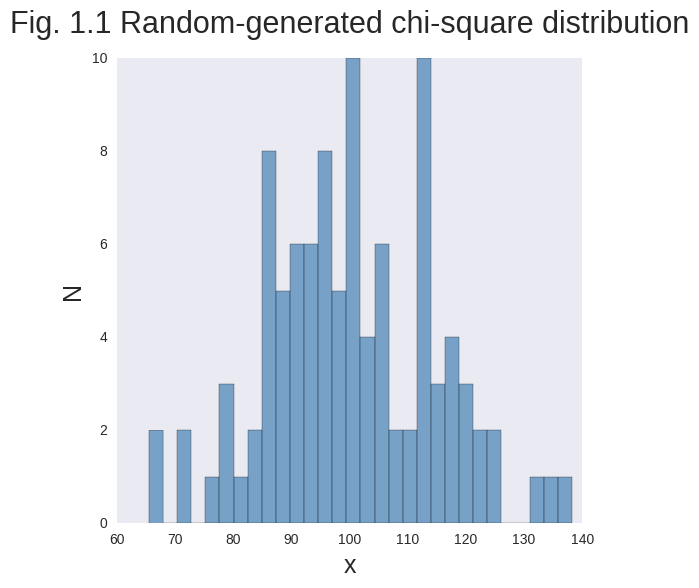

In [4]:
# md is an empty disctionary to host the distributions
md = {}

md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['chisq'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 1.1 Random-generated chi-square distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

### Fig. 1.1: Chi sq distribution: df = 100, N=100

In [5]:
# calculate what the mean and stdev of this distribution
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.17, standard deviation: 14.56


In [6]:
# generate 100 different sizes between 10 and 2000
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[362 901 192  20 591 456 876 679 643 193 612 967 524 902  39 347 399 694
 178 787 647 654 989 545 600 347 211 631 970 853 656 911 819 137  15 169
 421 940 630 978 567 248 872 921 254 248 131 457 465 836 152 514 924 910
 637 917 282 530 557 639 474 525 398  87 308 862 875 597 772 897 793 200
 591 303 711 937 911 184 156 837 913 311 781 888 496 964 656 216 561 269
 459 684 658 380 619 145 750 328 127 755] (100,)


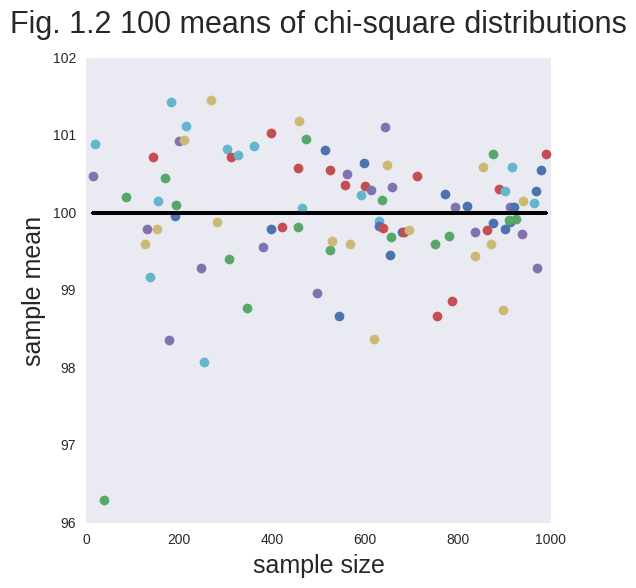

In [7]:
# store the sizes and means in dict
md['chisq'] = {} 

# and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    
md['chisq']['means'] = {}

# plot the figure
axchisq_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 1.2 100 means of chi-square distributions', fontsize=22, y=1.04)
plt.show()

### Figure 1.2: The sample mean is closer to population mean when the sample size get larger.

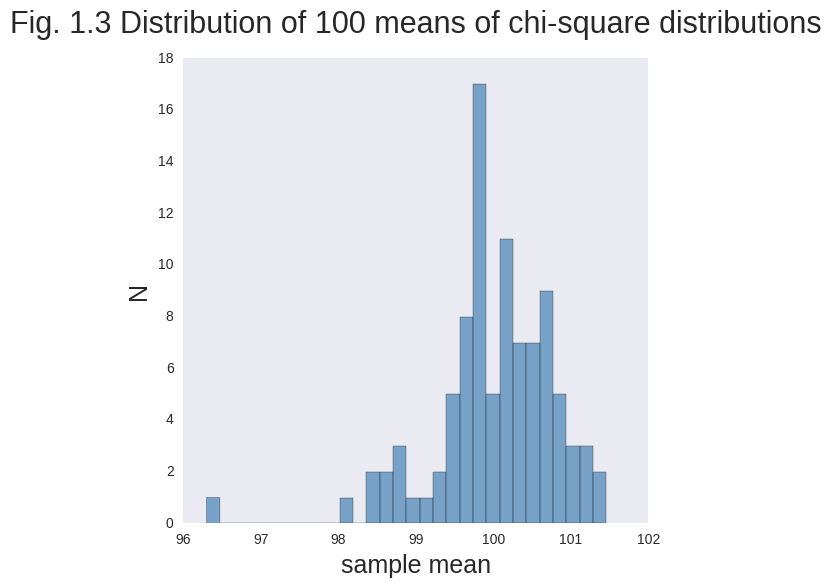

In [8]:
allmeansC = list(md['chisq']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansC,bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 1.3 Distribution of 100 means of chi-square distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

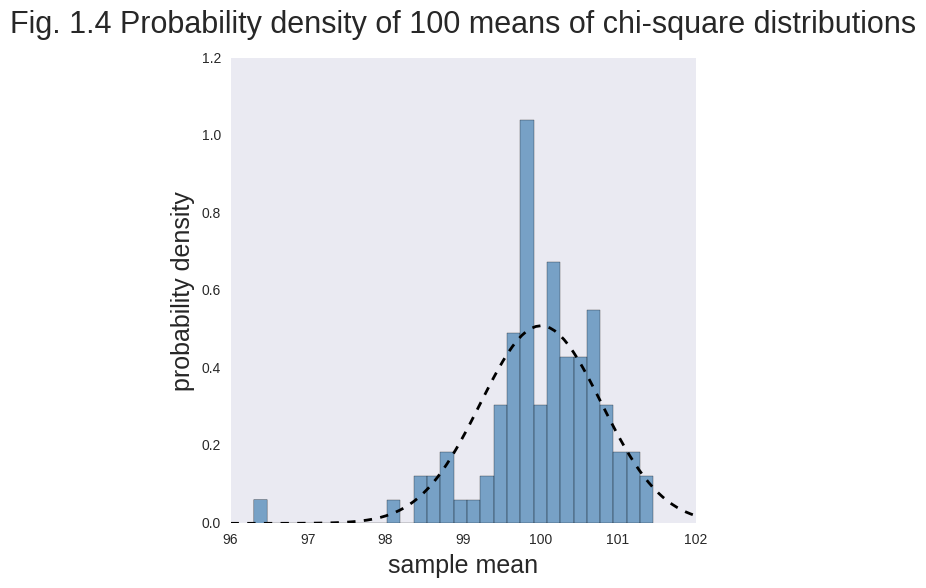

In [9]:
# fit a gaussian to the distribution of means of chi-square distributions
meanFormean = np.mean(allmeansC)
stdFormean = np.std(allmeansC)

plt.figure(figsize=(6,6))
plt.hist(allmeansC, bins=30, normed=True, color='SteelBlue', alpha=0.7)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k--', linewidth=2)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('probability density', fontsize = 18)
plt.title('Fig. 1.4 Probability density of 100 means of chi-square distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

# 2. Normal distribution


In [10]:
# set a mean
mymean = 100

#set the degrees of freedom
df = mymean

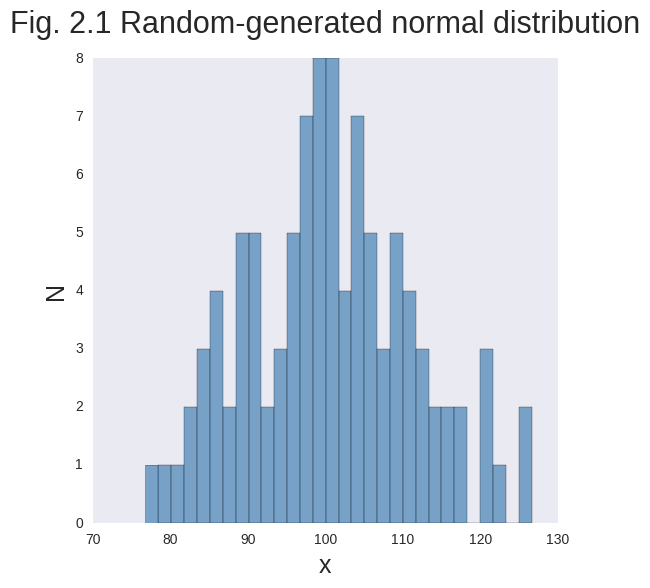

In [11]:
md['lnorm'] = np.random.normal(df, 10, size=100)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['lnorm'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 2.1 Random-generated normal distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

In [12]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

Normal mean: 100.52, standard deviation: 10.68


In [13]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[795 771 778 491 477 426 268 245 174 357  49  89 677 181 642 736 519 255
 934 651 593 637 966 394 888 681  40 193 997 615 273 367 637 634 423  75
 747 528  45 217 343 763 609 588 447 861 957 888 401 780  10 869 453 256
 293 372 877 421 585 910 234 978  37 605 366 124 309 305 309 960 534 751
 731  79  35 464 457  59 366 769 439 314 594 910  79 959 459 255 622 338
  91 335 746 923 956 924 988 829 217 885] (100,)


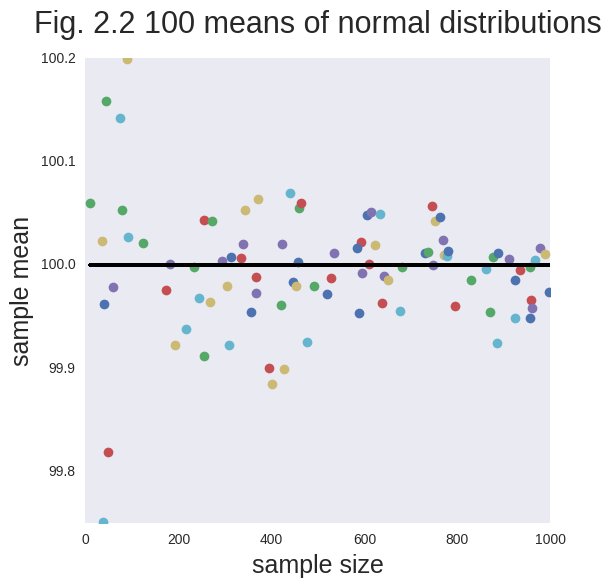

In [14]:
md['lnorm'] = {} 
for n in mysize:
    md['lnorm'][n] = np.random.normal(df, size = n)
md['lnorm']['means'] = {}

# plot the figure
axlnorm_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 2.2 100 means of normal distributions', fontsize=22, y=1.04)
plt.show()

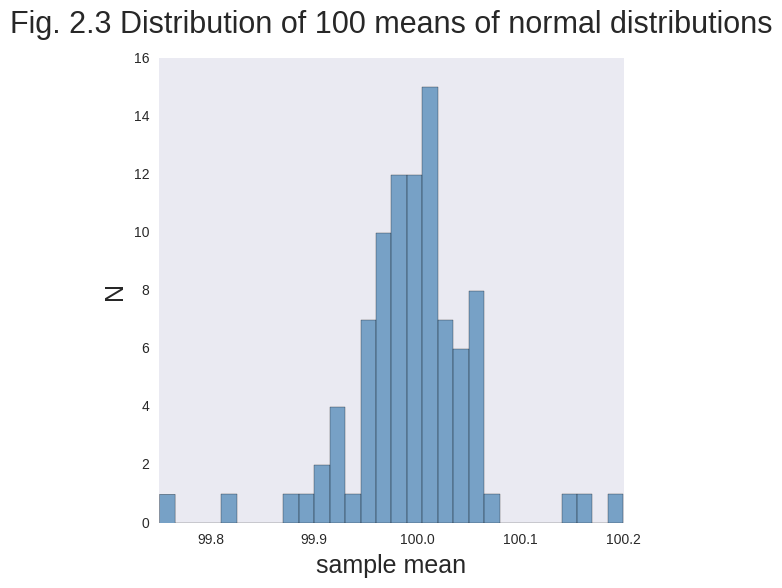

In [15]:
allmeansN = list(md['lnorm']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansN, bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 2.3 Distribution of 100 means of normal distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

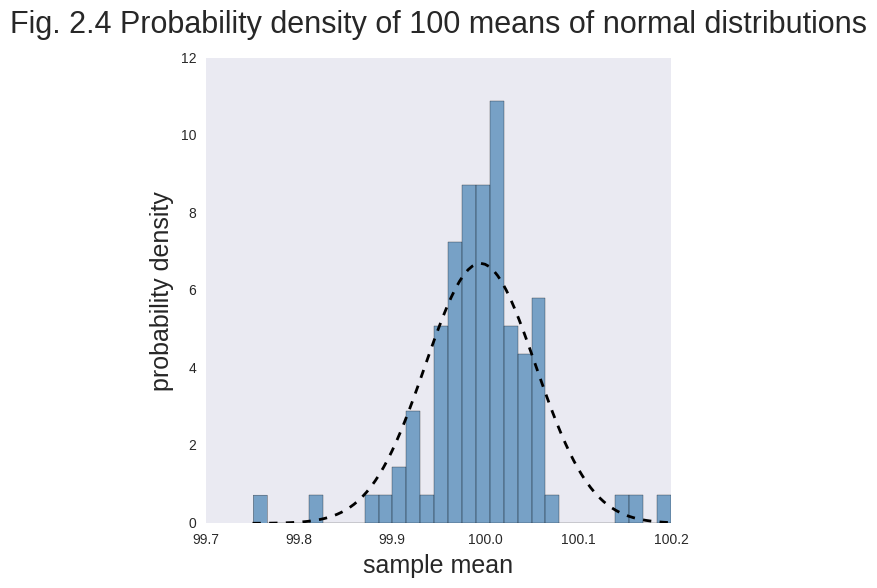

In [16]:
meanFormean = np.mean(allmeansN)
stdFormean = np.std(allmeansN)

plt.figure(figsize=(6,6))
plt.hist(allmeansN, bins=30, normed=True, color='SteelBlue', alpha=0.7)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)

# plot the figure
plt.plot(x, p, 'k--', linewidth=2)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('probability density', fontsize = 18)
plt.title('Fig. 2.4 Probability density of 100 means of normal distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

# 3. Poisson distribution

In [17]:
df = 100

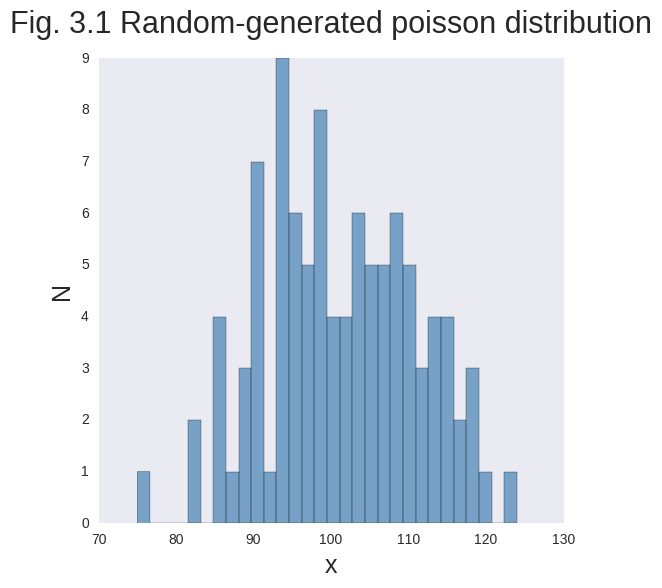

In [18]:
md['pois'] = np.random.poisson(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['pois'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 3.1 Random-generated poisson distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

In [19]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 101.18, standard deviation: 9.82


In [20]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[396 974  66 375 956 906 496  33 753 570 605 524 946 114 400 734 373 621
  54 606 166 364 851 817 341 448 748 696 130 515 357 751 808 270 279 224
  54 631 847 735 984 790 279 329 949 375 633 774 572 230 525 401 391 427
 941  69 976 367 292 538 466 255 764 890 307 320 982 783 908 201 593 253
 955 403 790 259  71  49  55 932 593 542 970 321 651 870 744 613 610 148
 807 417 510 206 373 798 786 477 540  90] (100,)


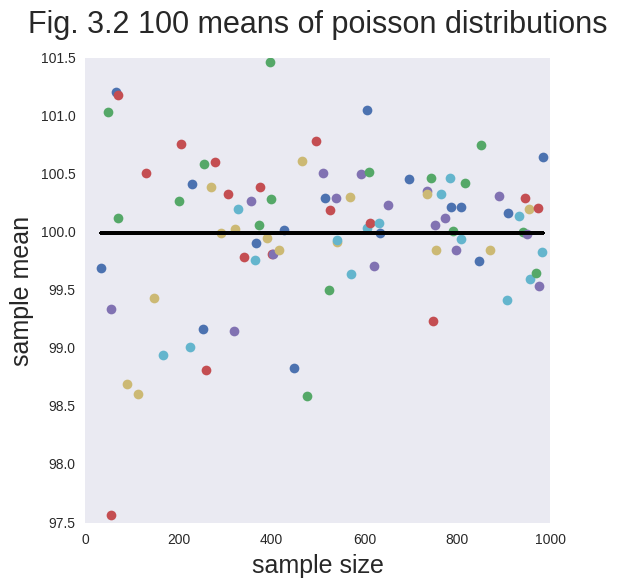

In [21]:
md['pois'] = {} 
for n in mysize:
    md['pois'][n] = np.random.poisson(df, size = n)
md['pois']['means'] = {}

# plot the figure
axpois_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 3.2 100 means of poisson distributions', fontsize=22, y=1.04)
plt.show()

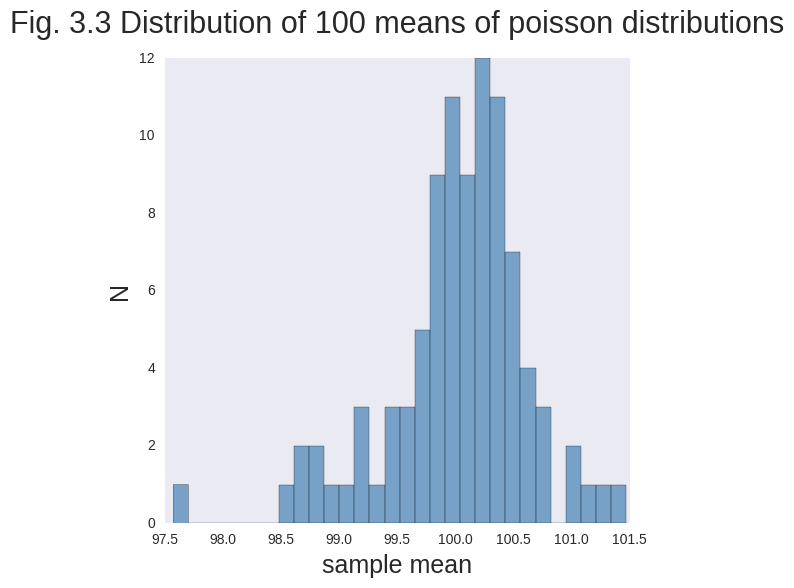

In [22]:
allmeansP = list(md['pois']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansP,bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 3.3 Distribution of 100 means of poisson distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

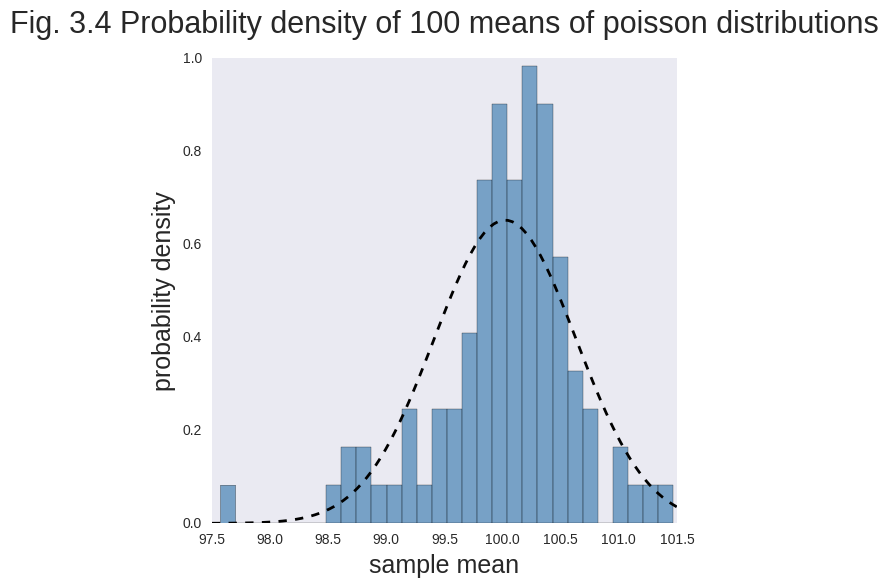

In [23]:
meanFormean = np.mean(allmeansP)
stdFormean = np.std(allmeansP)

plt.figure(figsize=(6,6))
plt.hist(allmeansP, bins=30, normed=True, color='SteelBlue', alpha=0.7)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
# the probability density function
p = norm.pdf(x, meanFormean, stdFormean)

# plot the figure
plt.plot(x, p, 'k--', linewidth=2)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('probability density', fontsize = 18)
plt.title('Fig. 3.4 Probability density of 100 means of poisson distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

# 4. Binomial distribution

In [24]:
distributions = ['binomial']

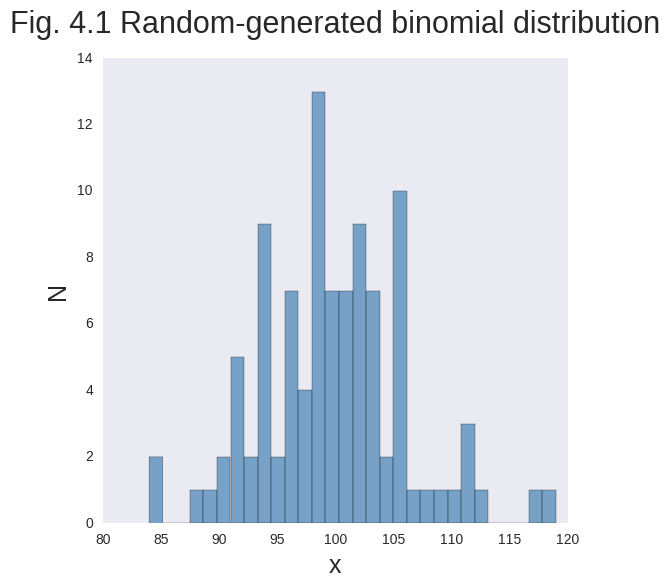

In [25]:
md['binomial'] = np.random.binomial(2*df, 0.5, size=100)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['binomial'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 4.1 Random-generated binomial distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

In [26]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.71, standard deviation: 6.24


In [27]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[181 138 797 686 327  90 978 869 980 738 233 638 483 619 395 868 604 563
 779  10 572 405  97 967 732 370 377 553 707  68 231 929 913 513 976 398
 665 549 394 457 755 217 395 922 130 313 353 773 414 164 437 702 379 275
  55 902 108 583 664  55 242  11 360 203 414 225  41 399 406 191 230  85
 894 905 473 824 882  11 772 922  53 804 857 473 969 453 775 677 263 869
 789  83 876  84 624 844 811 205 539 570] (100,)


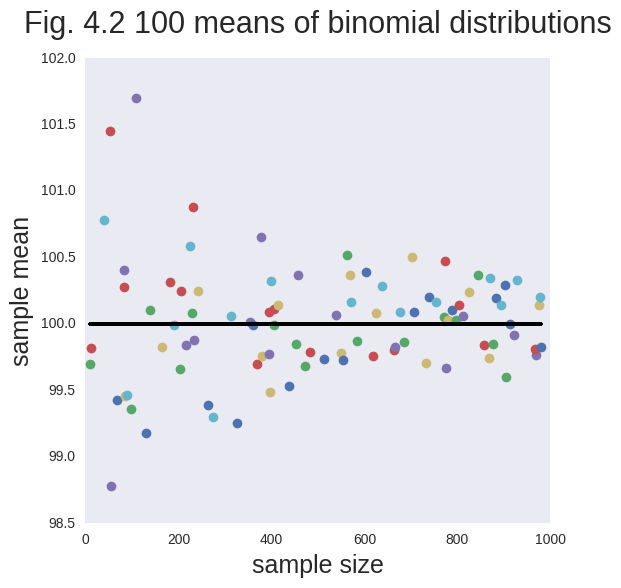

In [28]:
md['binomial'] = {} 
for n in mysize:
    md['binomial'][n] = np.random.binomial(2*df, 0.5, size = n)
md['binomial']['means'] = {}

# plot the figure
axbinomial_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 4.2 100 means of binomial distributions', fontsize=22, y=1.04)
plt.show()

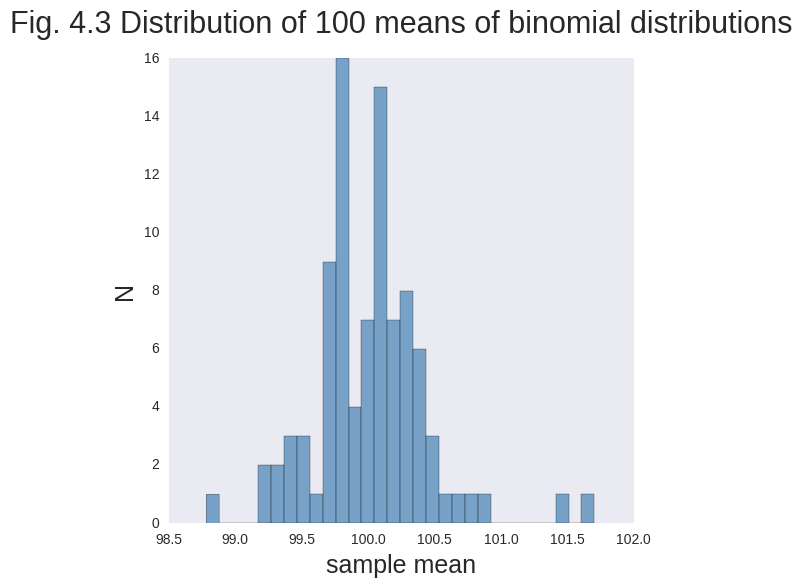

In [29]:
allmeansB = list(md['binomial']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansB,bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 4.3 Distribution of 100 means of binomial distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

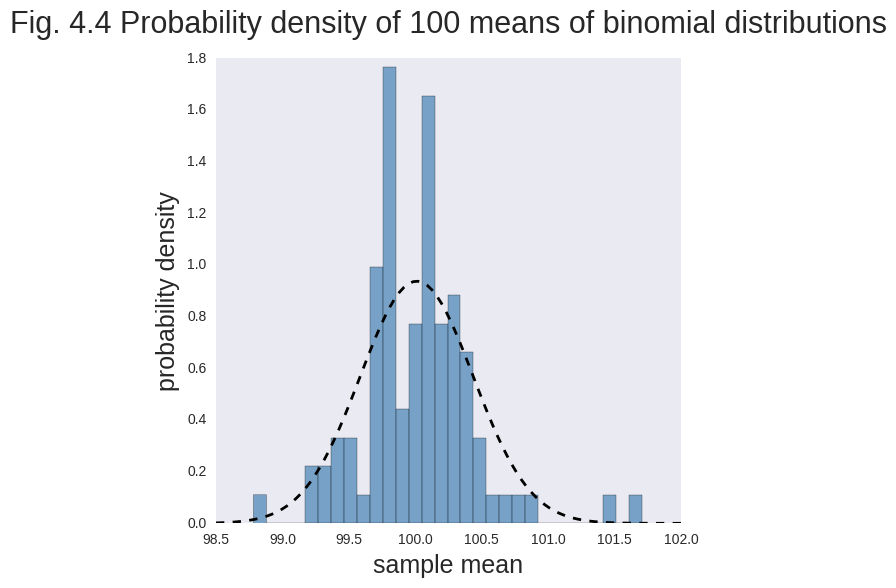

In [30]:
meanFormean = np.mean(allmeansB)
stdFormean = np.std(allmeansB)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansB, bins=30, normed=True, color='SteelBlue', alpha=0.7)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k--', linewidth=2)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('probability density', fontsize = 18)
plt.title('Fig. 4.4 Probability density of 100 means of binomial distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

# 5. Do it for another distribution: Laplace distribution

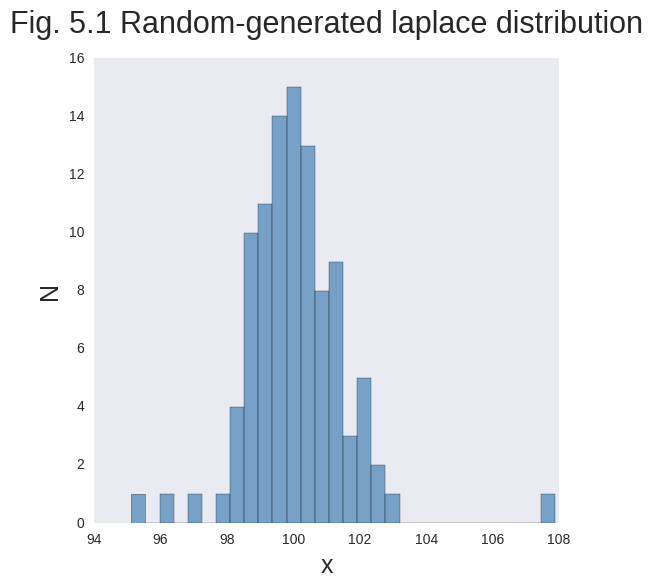

In [31]:
md['laplace'] = np.random.laplace(df, 1.0, size=100)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['laplace'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 5.1 Random-generated laplace distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

In [32]:
print ("laplace mean: %.2f, standard deviation: %.2f"%(md['laplace'].mean(), md['laplace'].std()))

laplace mean: 100.08, standard deviation: 1.52


In [33]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[221 176 138  90 543 128 266 333 612  53  45 199 799 105 566  41 187 689
 180 823 274 105 706 229 841 194 809  99 622 963 236 419 667 575 472 177
  89 163 390 523 793 483 855 329 833 716 315  51 953  54 102  97 765 948
 733 549 435 316 548 634 700 722  48 396 785 250 709 477 378 192 574 927
 957  50 386 723  39 889   2 202 845 512 313 366  37 611 347 899 383 687
 829 129 140 628 556 603  88 180  25 638] (100,)


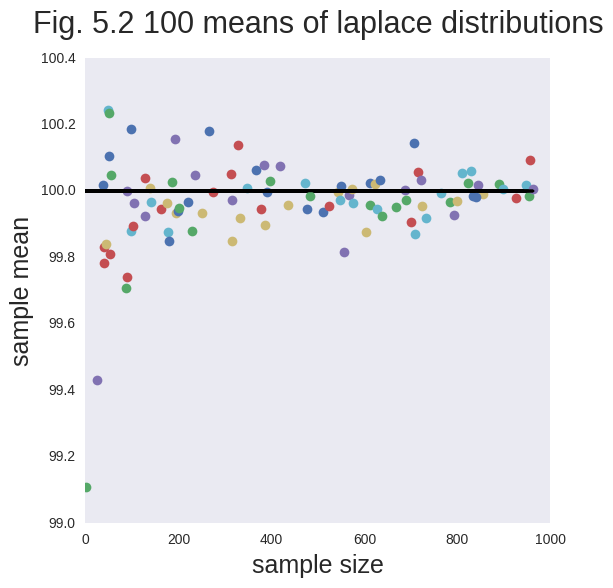

In [34]:
md['laplace'] = {} 
for n in mysize:
    md['laplace'][n] = np.random.laplace(df, 1.0, size = n)
md['laplace']['means'] = {}

# plot the figure
axlaplace_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['laplace']:
    if not type(nn) == str:
        md['laplace']['means'][nn] = md['laplace'][nn].mean()
        axlaplace_mu_n.plot(nn, md['laplace']['means'][nn], 'o')
        axlaplace_mu_n.set_xlabel('sample size', fontsize=18)
        axlaplace_mu_n.set_ylabel('sample mean', fontsize=18)
        axlaplace_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 5.2 100 means of laplace distributions', fontsize=22, y=1.04)
plt.show()

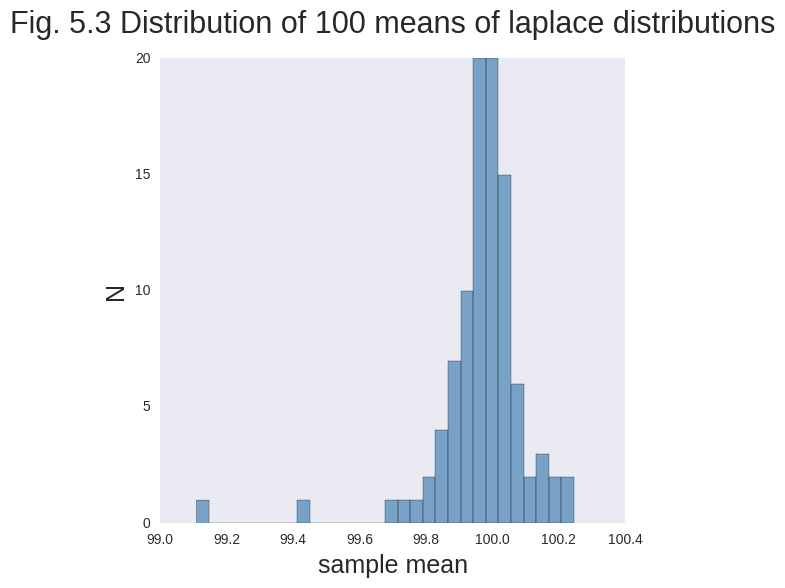

In [35]:
allmeansL = list(md['laplace']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansL,bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 5.3 Distribution of 100 means of laplace distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

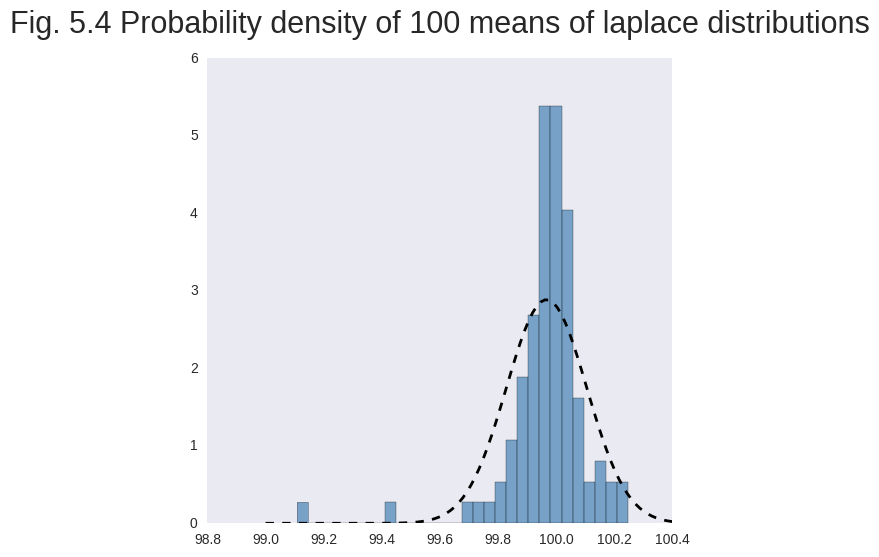

In [36]:
meanFormean = np.mean(allmeansL)
stdFormean = np.std(allmeansL)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansL, bins=30, normed=True, color='SteelBlue', alpha=0.7)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density functions
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k--', linewidth=2)
plt.title('Fig. 5.4 Probability density of 100 means of laplace distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

## 6. Extra Credit: FIT a gaussian to the distribution of means

In [37]:
# put all means in one list
allmeans = allmeansC + allmeansN + allmeansP + allmeansB + allmeansL

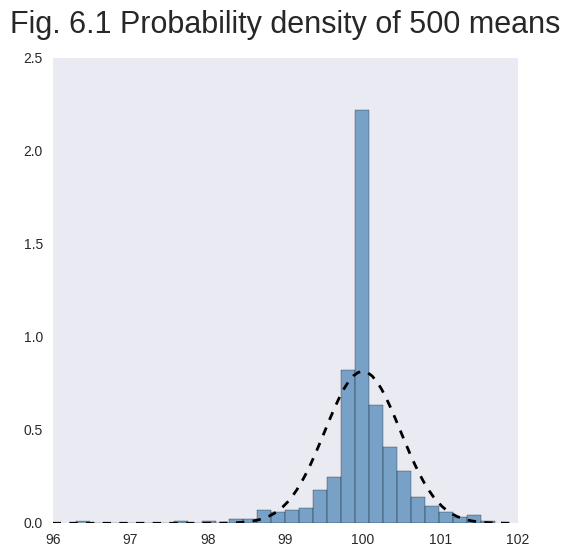

In [38]:
meanFormean = np.mean(allmeans)
stdFormean = np.std(allmeans)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeans, bins=30, normed=True, color='SteelBlue', alpha=0.7)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density functions
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k--', linewidth=2)
plt.title('Fig. 6.1 Probability density of 500 means', fontsize=22, y=1.04)
plt.grid(False)
plt.show()